In [7]:
from pathlib import Path 
import pandas as pd 
import tarfile
import urllib.request
import os
import certifi

# To handle certificate error- downloading datasets
os.environ['SSL_CERT_FILE'] = certifi.where()

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz") 
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [10]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
# Only numerical values are shown here
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing["ocean_proximity"].value_counts(dropna=False)

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

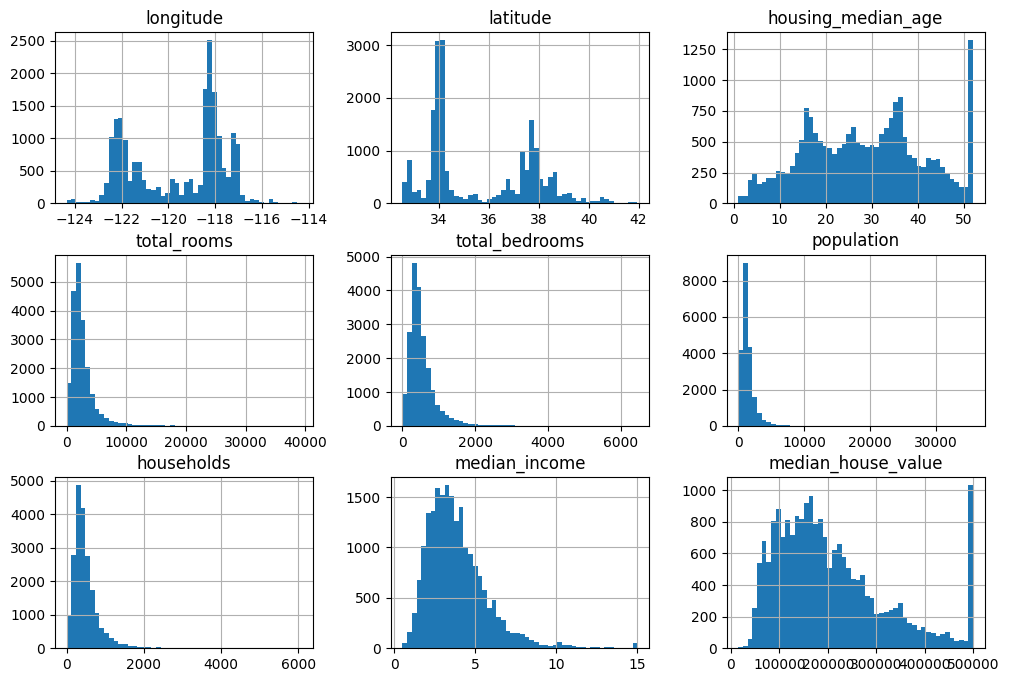

In [16]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(12,8))
plt.show()

In [21]:
!pip install scikit_learn

  Obtaining dependency information for scikit_learn from https://files.pythonhosted.org/packages/18/ff/919087b9aa5318c3992def31b74e019eee39c57ff6bf140289041df3db86/scikit_learn-1.4.1.post1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/b1/2c/f504e55d98418f2fcf756a56877e6d9a45dd5ed28b3d7c267b300e85ad5b/threadpoolctl-3.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 3.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [22]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [23]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0,NEAR BAY
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0,<1H OCEAN
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0,INLAND
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0,INLAND


In [44]:
import numpy as np
housing["income_cat"]=pd.cut(housing["median_income"],
                             bins=[0.,1.5,3.0,4.5,6.,np.inf],
                             labels=[1,2,3,4,5]
                             )

<Axes: xlabel='income_cat'>

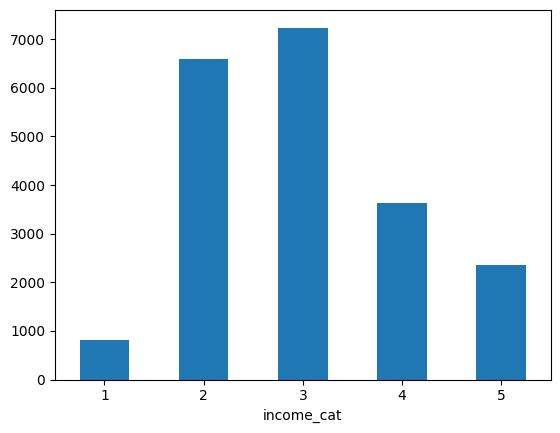

In [45]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0)

<Axes: xlabel='income_cat'>

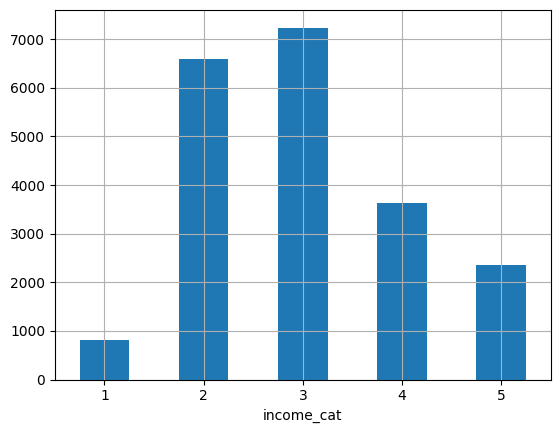

In [46]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)

In [47]:
# Stratified sampling 
strat_train, strat_test = train_test_split(housing,
                                           test_size=0.2,
                                           stratify=housing["income_cat"],
                                           random_state=42
                                           )


In [56]:
strat_train['income_cat'].value_counts()/len(strat_train)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [57]:
strat_test['income_cat'].value_counts()/len(strat_test)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [58]:
for set in (strat_test, strat_train):
    set.drop("income_cat",axis=1, inplace=True)

In [59]:
strat_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 3905 to 3455
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4089 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [61]:
housing=train_set.copy()

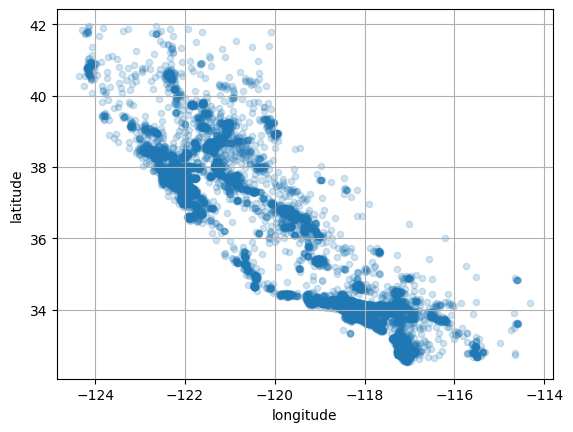

In [66]:
housing.plot(kind="scatter",x="longitude", y="latitude",grid=True,alpha=0.2)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

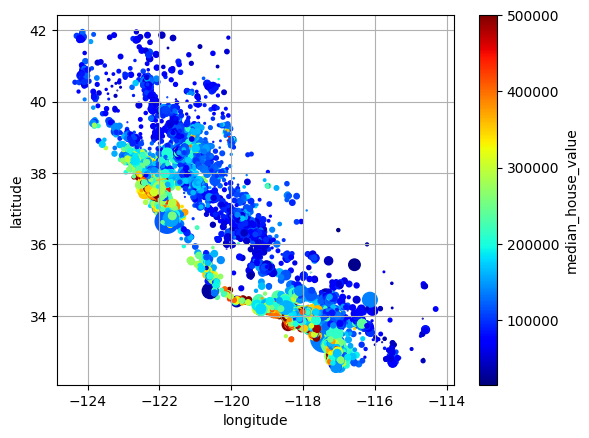

In [70]:
housing.plot(kind="scatter",x="longitude", y="latitude", grid=True,
             s=housing["population"]/100, c="median_house_value",
             cmap="jet",colorbar=True
             )

In [75]:
from pandas.plotting import scatter_matrix

In [76]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [82]:
corr_matrix=housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value']].corr()

In [84]:
corr_matrix["median_house_value"]

longitude            -0.043603
latitude             -0.146324
housing_median_age    0.104714
total_rooms           0.134060
total_bedrooms        0.049993
population           -0.025820
households            0.065798
median_income         0.687013
median_house_value    1.000000
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

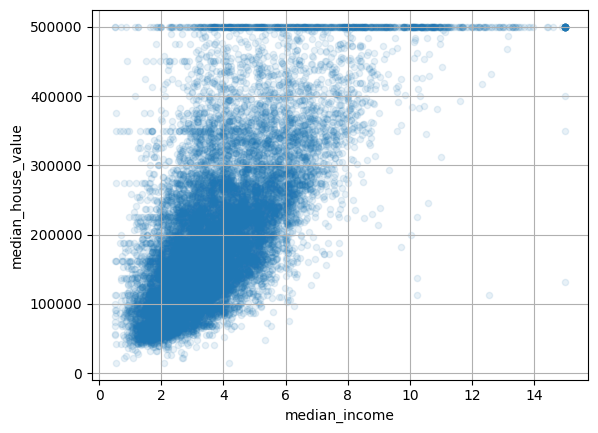

In [86]:
housing.plot(kind='scatter', x='median_income',y='median_house_value',
                alpha=0.1,grid=True)

In [87]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

In [89]:
housing_num=housing.select_dtypes(include=[np.number])

In [90]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [91]:
X=imputer.transform(housing_num)

array([[-1.1722e+02,  3.2750e+01,  3.4000e+01, ...,  1.0720e+03,
         4.5878e+00,  2.9100e+05],
       [-1.1703e+02,  3.2690e+01,  1.0000e+01, ...,  1.6700e+02,
         4.6648e+00,  1.5610e+05],
       [-1.2227e+02,  3.7740e+01,  2.8000e+01, ...,  1.4840e+03,
         3.6875e+00,  3.5390e+05],
       ...,
       [-1.1933e+02,  3.6280e+01,  1.6000e+01, ...,  5.2000e+02,
         2.1250e+00,  1.0420e+05],
       [-1.1719e+02,  3.4080e+01,  2.2000e+01, ...,  4.9400e+02,
         2.6536e+00,  8.4700e+04],
       [-1.1886e+02,  3.4220e+01,  2.2000e+01, ...,  1.9500e+02,
         6.2708e+00,  2.5140e+05]])

In [95]:
imputer.strategy

'median'

In [96]:
imputer.statistics_

array([-1.1849e+02,  3.4250e+01,  2.9000e+01,  2.1290e+03,  4.3700e+02,
        1.1690e+03,  4.1100e+02,  3.5246e+00,  1.7920e+05])

In [97]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [99]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

housing_cat=enc.fit_transform(housing[["ocean_proximity"]])

In [101]:
enc.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [103]:
#onehotencoder
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
housing_cat_1ht=onehot.fit_transform(housing[["ocean_proximity"]])

In [107]:
# pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_p=Pipeline(
[("impute",SimpleImputer(strategy="median")),
("standardize",StandardScaler()),]
)



In [110]:
housing.select_dtypes(np.number)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0
...,...,...,...,...,...,...,...,...,...
11284,-122.37,37.94,49.0,969.0,229.0,599.0,195.0,1.3167,71600.0
11964,-118.38,33.89,35.0,1778.0,330.0,732.0,312.0,6.5745,379300.0
5390,-119.33,36.28,16.0,2624.0,527.0,1077.0,520.0,2.1250,104200.0
860,-117.19,34.08,22.0,2467.0,555.0,1567.0,494.0,2.6536,84700.0


In [111]:
num_p.fit_transform(housing.select_dtypes(np.number))

array([[ 1.17299302, -1.35041487,  0.42853749, ...,  1.50750741,
         0.37969797,  0.73953621],
       [ 1.26802809, -1.37853628, -1.47350948, ..., -0.87870693,
         0.42006824, -0.43568808],
       [-1.3529389 ,  0.98834939, -0.04697426, ...,  2.5938282 ,
        -0.09231969,  1.28750958],
       ...,
       [ 0.11760365,  0.30406165, -0.99799774, ...,  0.0520485 ,
        -0.91152173, -0.88783145],
       [ 1.18799856, -0.72705686, -0.522486  , ..., -0.01650573,
        -0.63438241, -1.0577119 ],
       [ 0.35269038, -0.66144022, -0.522486  , ..., -0.80487931,
         1.26207687,  0.39454821]])

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
num_cols=["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_income"]
cat_cols=["ocean_proximity"]


num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
     OneHotEncoder(handle_unknown="ignore")
)
cat_pipeline = make_pipeline( SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

preprocessing=ColumnTransformer([
    ("num",num_pipeline,num_cols),
    ("cat",cat_pipeline,cat_cols)
])




In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
scoring="neg_root_mean_squared_error", cv=10)

NameError: name 'tree_reg' is not defined

In [115]:
from sklearn.ensemble import RandomForestRegressor

ImportError: cannot import name 'Ran' from 'sklearn.ensemble' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/__init__.py)